In [1]:
import noise
import numpy as np
from PIL import Image

# perlin noise

In [2]:
def rgb_norm(world):
    world_min = np.min(world)
    world_max = np.max(world)
    norm = lambda x: (x-world_min/(world_max - world_min))*255
    return np.vectorize(norm)

def prep_world(world):
    norm = rgb_norm(world)
    world = norm(world)
    return world

-0.37810763716697693 0.4576026499271393


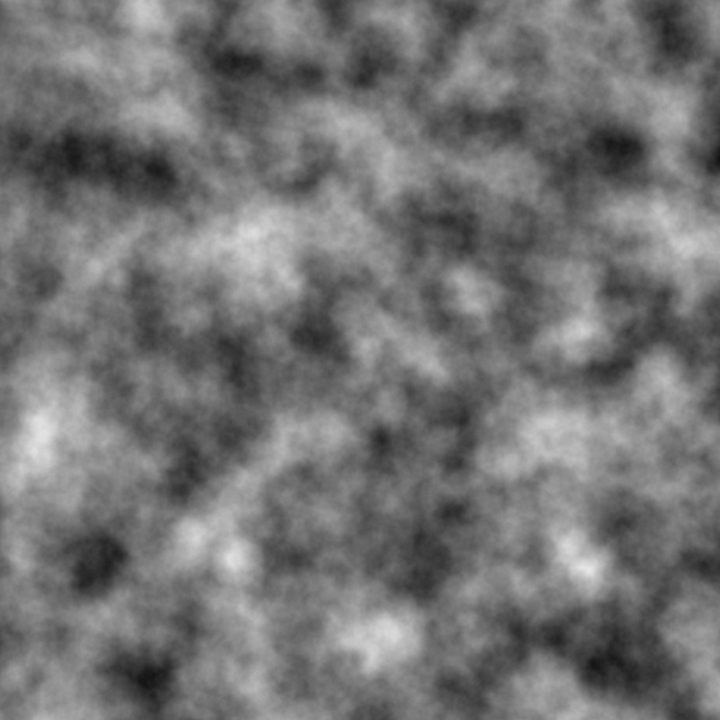

In [57]:
shape = (720, 720)
scale = 100
octaves = 6
persistence = 0.5
lacunarity = 2
seed = np.random.randint(0, 100000)
seed = 42

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)

# Image.fromarray(prep_world(world)).show()
print(np.min(world), np.max(world))
# world = prep_world(world)
# print(np.min(world), np.max(world))
result = Image.fromarray(prep_world(world)).convert('L')
display(result)

# adding color

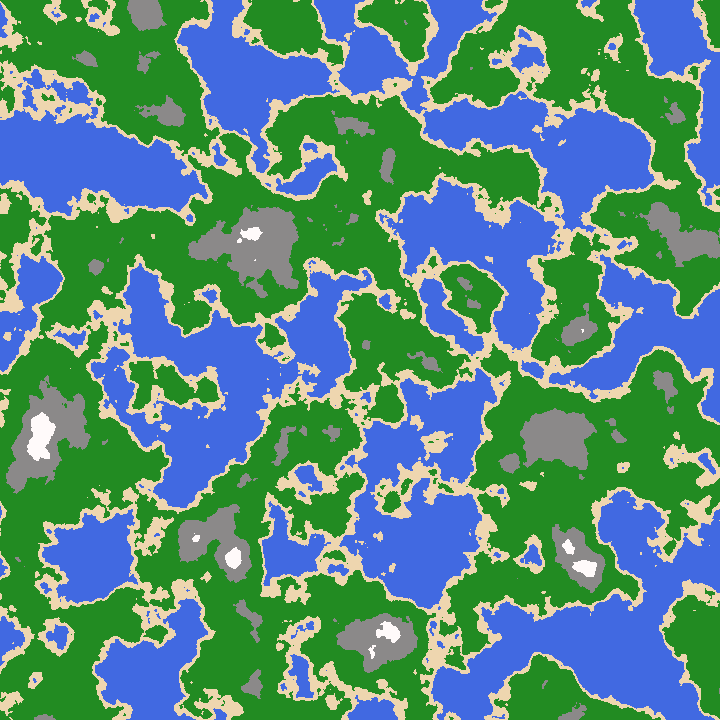

In [58]:
blue = [65, 105, 225]
green = [34, 139, 34]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

def add_color(world):
    color_world = np.zeros(world.shape+(3,))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < -0.05:
                color_world[i][j] = blue
            elif world[i][j] < 0:
                color_world[i][j] = beach
            elif world[i][j] < .20:
                color_world[i][j] = green
            elif world[i][j] < 0.35:
                color_world[i][j] = mountain
            elif world[i][j] < 1.0:
                color_world[i][j] = snow

    return color_world

color_world = add_color(world).astype(np.uint8)
#Image.fromarray(color_world,'RGB').show()
display(Image.fromarray(color_world,'RGB'))

# Create mask

1.0 0.0


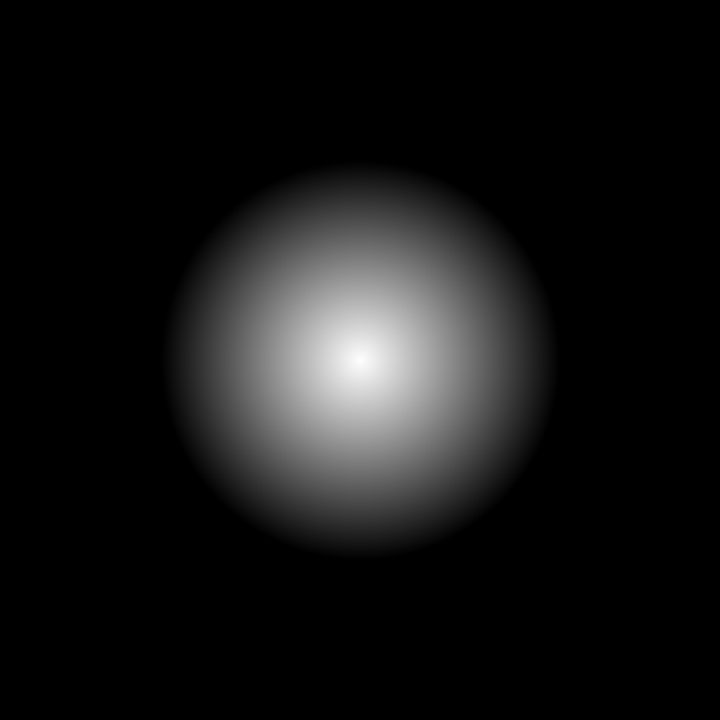

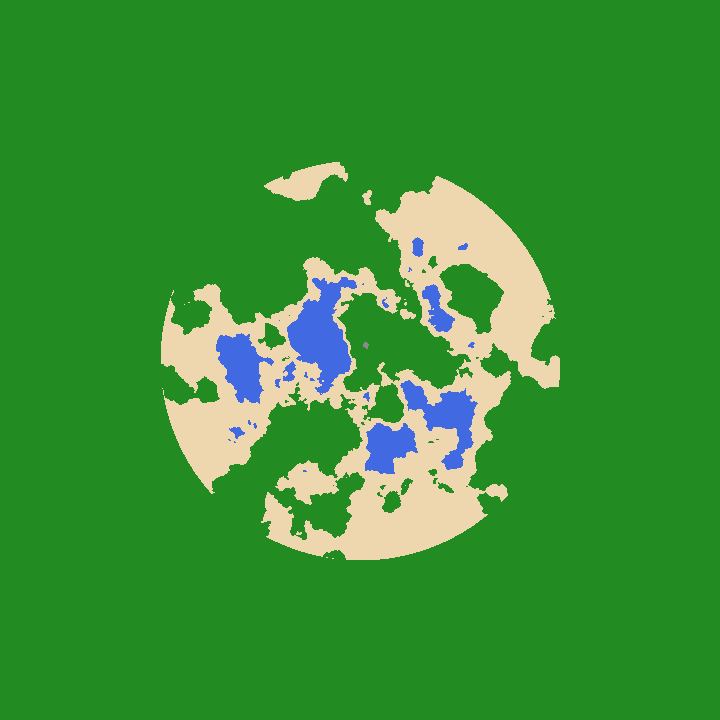

In [72]:
def center_mask(size, radius):
    mask = np.zeros(size)
    center = (size[0]//2, size[1]//2)
    for i in range(size[0]):
        for j in range(size[1]):
            if (a := (i-center[0])**2 + (j-center[1])**2) < radius**2:
                mask[i][j] = 1-np.sqrt(a)/radius
                
    return mask

mask = center_mask(shape, 200)
print(np.max(mask), np.min(mask))
display(Image.fromarray(mask*255).convert('L'))
masked_world = world*mask
color_world = add_color(masked_world).astype(np.uint8)
display(Image.fromarray(color_world,'RGB'))

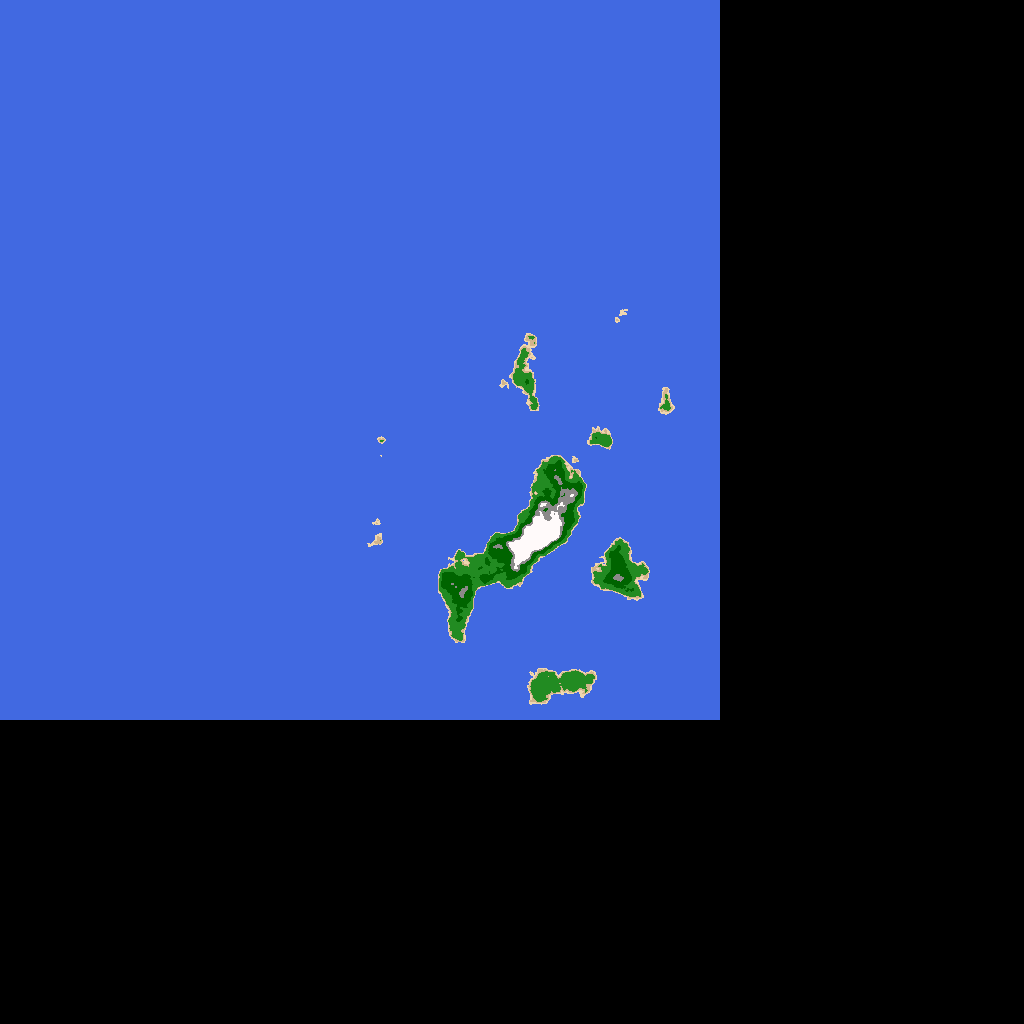

In [69]:
lightblue = [0,191,255]
blue = [65,105,225]
green = [34,139,34]
darkgreen = [0,100,0]
sandy = [210,180,140]
beach = [238, 214, 175]
snow = [255, 250, 250]
mountain = [139, 137, 137]

threshold = 50

def add_color2(world):
    color_world = np.zeros(world.shape + (3,))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if world[i][j] < threshold + 100:
                color_world[i][j] = blue
            elif world[i][j] < threshold + 102:
                color_world[i][j] = beach
            elif world[i][j] < threshold + 104:
                color_world[i][j] = sandy
            elif world[i][j] < threshold + 115:
                color_world[i][j] = green
            elif world[i][j] < threshold + 130:
                color_world[i][j] = darkgreen
            elif world[i][j] < threshold + 137:
                color_world[i][j] = mountain
            else:
                color_world[i][j] = snow

    return color_world

island_world_grad = add_color2(prep_world(world_noise)).astype(np.uint8)
display(Image.fromarray(island_world_grad,'RGB'))